## Supplementary notebook for Size matters: Tissue size as a marker for a transition between Reaction-Diffusion regimes in spatiotemporal distribution of morphogens.
### Alberto S. Ceccarelli <sup>1</sup> , Augusto Borges <sup>1, 2, 3</sup> & Osvaldo Chara <sup>1,4,5</sup>
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### 5 Instituto de Tecnología, Universidad Argentina de la Empresa (UADE), Buenos Aires, Argentina.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig S.1 from the paper.
#### Run the following cell to plot fig S.1 from the paper and to save it as a png image.
##### Expected computational time: Between 2 and 3 hours.

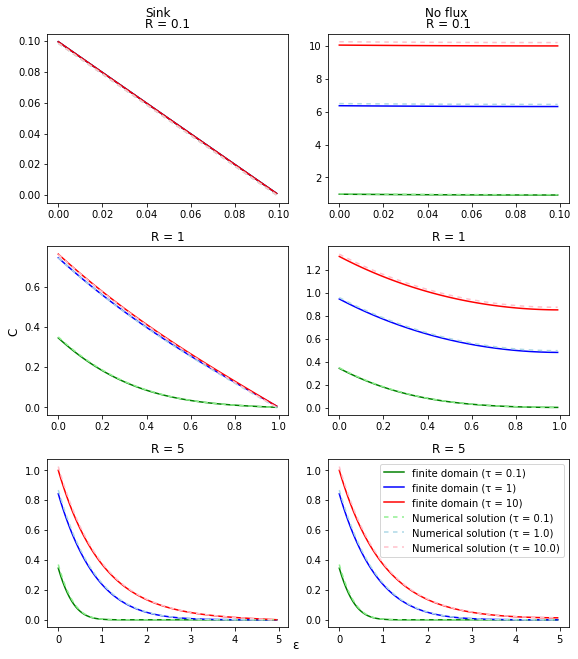

My program took 32408.520926713943 seconds to run


In [10]:
# Figure S.1. Comparison between the numerical and analytical solution for the concentration as a
# function of space for different times.

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))

# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux4(j):
    return (j)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux5(x,t,j):
    return (2/R)*np.cos(aux4(j)*x)*(1/(aux4(j)**2+1))*(np.exp(-((((aux4(j))**2)+1)*t)))


# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work for reflecting boundary conditions.
def c_finite2(x,t,j):
    return -sum(aux5(x,t,j))-(np.exp(-x)/(np.exp(-2*R)-1)+np.exp(x)/(1-np.exp(2*R)))-np.exp(-t)/R

# This part of the code will plot the analytical solution.

# Creates the figure with 2x2 subplots.
fig, ax = plt.subplots(3, 2,figsize=(8,9))
# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the lengths of the tissues that are going to be simulated.
lengths = [0.1,1,5]
# Define the times that are going to be simulated.
times = [0.1, 1, 10]
# Define colors that are going to be used when ploting the solutions
colors_line = ["g", "b", "r"]
colors_dashed = ["lightgreen", "lightblue", "pink"]
# Define the positions in the figure that are going to be used when plotting.
positions = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1]]
# Define a counter used when plotying
position_counter = 0
# Loop for all lengths
for length in lengths:
#     Set R to the dessired length
    R = length
# Define an array of terms to be used when calculating c_finite(x,t,j)
    j = np.arange(0,5000,1)
#     Create an array of spatial coordintates for a tissue of length R.
    xi_all = np.arange(0,R,R/100)
#     A counter used to select the colors in the figures.
    color_counter = 0
#     A loop that goes through all desired times.
    for tf_counter in times:
#         Define empty arrays to fill with the concentration calculated.
        c1_finite = []
#         Loop in every position in space.
        for xi in xi_all:
#             Fill the arrays with the calculated concentration.
            c1_finite.append(c_finite(xi,tf_counter,j))
#         Creates each subplot. If R=10 it also adds a label.
        if R == 10:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, label="finite domain (τ = "+str(tf_counter)+")", color=colors_line[color_counter])
        else:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, color=colors_line[color_counter])
#         Update color counter.
        color_counter += 1
#     Set tittle.
    ax[positions[position_counter][0], positions[position_counter][1]].set_title("R = "+str(R),fontsize= 12)
#     Update position counter.
    position_counter += 1
    
#     Set R to the dessired length
    R = length
# Define an array of terms to be used when calculating c_finite(x,t,j)
    j = np.arange(1,5000,1)
#     Create an array of spatial coordintates for a tissue of length R.
    xi_all = np.arange(0,R,R/100)
#     A counter used to select the colors in the figures.
    color_counter = 0
#     A loop that goes through all desired times.
    for tf_counter in times:
#         Define empty arrays to fill with the concentration calculated.
        c1_finite = []
#         Loop in every position in space.
        for xi in xi_all:
#             Fill the arrays with the calculated concentration.
            c1_finite.append(c_finite2(xi,tf_counter,j))
#         Creates each subplot. If R=10 it also adds a label.
        if R == 5:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, label="finite domain (τ = "+str(tf_counter)+")", color=colors_line[color_counter])
#             Adds a label.
            ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 10})
        else:
#             Plots the concentration in a finite tissue as a continuous line.
            ax[positions[position_counter][0], positions[position_counter][1]].plot(xi_all, c1_finite, color=colors_line[color_counter])
#         Update color counter.
        color_counter += 1
#     Set tittle.
    ax[positions[position_counter][0], positions[position_counter][1]].set_title("R = "+str(R),fontsize= 12)
#     Update position counter.
    position_counter += 1

# This part of the code will plot the numerical solution.

# Define arrays to be used later.    
lengths = [0.1,1,5]
times = [0.1, 1, 10]
color_counter = 0
position_counter = 0
# Loop over all tissue lengths.
for length in lengths:
    R = length
#     Set the number of positions in the tissue
    nx=100;
#     Set the length of each position step
    dx=length/nx;
#     Set the time step such that the simulation does not oscilate
    dt=(dx**2)/3;
#     Calculate the maximun number of times to be simulated.
    nt=int(10/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,2]);
    color_counter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
#             Calculate the new concentration.
            p1[xi,1]=p1[xi,0]+dt*((p1[xi+1,0]-2*p1[xi,0]+p1[xi-1,0])/np.power(dx,2))-dt*p1[xi,0];
#         Boundary conditions.
        p1[nx-1,1]=0;
        p1[0,1]=p1[1,1]+dx;
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            p1[xi,0]=p1[xi,1]
#         if the current time is of our interest we enter here.        
        if round(m*dt,10) in times:
            ctoplot=[]
#             Add the concentration to an array to plot it.
            for xi in np.arange(0,nx):
                ctoplot.append(p1[xi,1])           
#         Creates each subplot. If R=10 it also adds a label.
            if R == 10:
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, label="Numerical solution (τ = "+str(round(m*dt,10))+")", color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
#             Adds a label.
                ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 10})
            else:  
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
    #         Update color counter.
            color_counter += 1
#         Update position counter.
    position_counter += 1
    
    
# Calculates numerically for the reflecting boundary condition.
    R = length
#     Set the number of positions in the tissue
    nx=100;
#     Set the length of each position step
    dx=length/nx;
#     Set the time step such that the simulation does not oscilate
    dt=(dx**2)/3;
#     Calculate the maximun number of times to be simulated.
    nt=int(10/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,2]);
    color_counter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
#             Calculate the new concentration.
            p1[xi,1]=p1[xi,0]+dt*((p1[xi+1,0]-2*p1[xi,0]+p1[xi-1,0])/np.power(dx,2))-dt*p1[xi,0];
#         Boundary conditions.
        p1[nx-1,1]=p1[nx-2,1];
        p1[0,1]=p1[1,1]+dx;
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            p1[xi,0]=p1[xi,1]
#         if the current time is of our interest we enter here.        
        if round(m*dt,10) in times:
            ctoplot=[]
#             Add the concentration to an array to plot it.
            for xi in np.arange(0,nx):
                ctoplot.append(p1[xi,1])           
#         Creates each subplot. If R=10 it also adds a label.
            if R == 5:
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, label="Numerical solution (τ = "+str(round(m*dt,10))+")", color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
#             Adds a label.
                ax[positions[position_counter][0], positions[position_counter][1]].legend(loc=1, prop={'size': 10})
            else:  
#             Plots the concentration in a finite tissue as a dashed line.
                ax[positions[position_counter][0], positions[position_counter][1]].plot(np.arange(0,nx)*dx, ctoplot, color=colors_dashed[color_counter], ls = '--', dashes=(3, 3))
    #         Update color counter.
            color_counter += 1
#         Update position counter.
    position_counter += 1
# Axis label is added and the figure is saved as figsup.png and shown. 
fig.text(0.5,  0.01, 'ε', ha='center',fontsize= 12)
fig.text(0, 0.5, 'C', va='center', rotation='vertical',fontsize= 12)
fig.text(0.24, 0.985, 'Sink',fontsize= 12)
fig.text(0.725, 0.985, 'No flux',fontsize= 12)
plt.tight_layout()
plt.savefig("figsup.png", dpi=500)
plt.show()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")